# Content-based Forward Feature Selection (RF)

In [1]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

The URL dataset with generated lexical and content-based features are read from a csv file. These are then displayed for visualization purposes.

In [2]:
dataset = pd.read_csv('binary_unbalanced_with_content.csv')
dataset.head()

,url_type,blank_lines_count,blank_spaces_count,word_count,average_word_len,webpage_size,webpage_entropy,js_count,sus_js_count,js_eval_count,...,has_swf_in_string,has_cgi_in_string,has_php_in_string,has_abuse_in_string,has_admin_in_string,has_bin_in_string,has_personal_in_string,has_update_in_string,has_verification_in_string,url_scheme
0,1,14,36,0,0.000000,1186,5.269303,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,415,3952,11450,4.683930,26155,4.565537,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,5715,88450,420,5.833333,339327,4.656704,13,10,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1461,6292,3049,4.515907,89249,5.149580,11,2,0,...,0,0,0,0,0,0,0,0,0,0
4,0,43,273,0,0.000000,1530,4.754726,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
features = dataset.iloc[:, 1:]
url_type = dataset.iloc[:, 0]

In [4]:
features.head()

,blank_lines_count,blank_spaces_count,word_count,average_word_len,webpage_size,webpage_entropy,js_count,sus_js_count,js_eval_count,js_escape_count,...,has_swf_in_string,has_cgi_in_string,has_php_in_string,has_abuse_in_string,has_admin_in_string,has_bin_in_string,has_personal_in_string,has_update_in_string,has_verification_in_string,url_scheme
0,14,36,0,0.000000,1186,5.269303,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,415,3952,11450,4.683930,26155,4.565537,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5715,88450,420,5.833333,339327,4.656704,13,10,1,2,...,0,0,0,0,0,0,0,0,0,0
3,1461,6292,3049,4.515907,89249,5.149580,11,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,43,273,0,0.000000,1530,4.754726,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
url_type.head()

0    1
1    0
2    0
3    0
4    0
Name: url_type, dtype: int64

A forward feature selection algorithm is then ran on the dataset using RF with a scoring that's dependent on accuracy and a cross validatoin of 5.

In [6]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(n_jobs = 8), k_features = 113, forward = True,
                                                      floating = False, verbose = 10, scoring = 'accuracy', n_jobs = 8).fit(features, url_type)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    6.9s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:   21.3s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:   28.4s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   38.3s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   46.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 110 out of 113 | elapsed:  2.8min remaining:    4.6s
[Parallel(n_jobs=8)]: Done 113 out of 113 | elapsed:  2.8min finished

[2024-04-03 02:26:53] Features: 1/113 -- score: 0.8164293317650249[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: D

Once all iterations have finished, the results of each iteration are displayed.

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(47,)","[0.877148260833813, 0.727215415398953, 0.6325960036181235, 0.8886330619740701, 0.9565539170001645]",0.816429,"(url_host_length,)",0.152391,0.118565,0.059283
2,"(27, 47)","[0.9144533070197078, 0.7707151275936738, 0.6985171175616041, 0.8940876572650276, 0.9691080532865523]",0.849376,"(input_tag_count, url_host_length)",0.127905,0.099515,0.049757
3,"(27, 47, 48)","[0.97601622673574, 0.7890524353808623, 0.7050955239426582, 0.909437272154154, 0.9805109369003893]",0.872022,"(input_tag_count, url_host_length, url_number_of_subdirectories)",0.139302,0.108382,0.054191
4,"(6, 27, 47, 48)","[0.9594605706767536, 0.836663651563742, 0.7483759559246772, 0.9282131403667462, 0.9557590044405461]",0.885694,"(js_count, input_tag_count, url_host_length, url_number_of_subdirectories)",0.105078,0.081754,0.040877
5,"(6, 27, 47, 48, 56)","[0.959515390729929, 0.8838637173478058, 0.8306334457144423, 0.9466600882602856, 0.9366811030097034]",0.911471,"(js_count, input_tag_count, url_host_length, url_number_of_subdirectories, url_num_periods)",0.061584,0.047914,0.023957
6,"(6, 27, 37, 47, 48, 56)","[0.9649973960474741, 0.9126442452649179, 0.8761340898500671, 0.9619000630430612, 0.9373389616797325]",0.930603,"(js_count, input_tag_count, url_length, url_host_length, url_number_of_subdirectories, url_num_periods)",0.042618,0.033158,0.016579
7,"(6, 27, 37, 39, 47, 48, 56)","[0.9723706931995724, 0.9235808458734205, 0.8796151632267083, 0.9684510593975276, 0.9552656104380243]",0.939857,"(js_count, input_tag_count, url_length, url_domain_entropy, url_host_length, url_number_of_subdirectories, url_num_periods)",0.044547,0.034659,0.017329
8,"(1, 6, 27, 37, 39, 47, 48, 56)","[0.9749472356988186, 0.9265685387714826, 0.8857550091823589, 0.9720417728805197, 0.9560605229976427]",0.943075,"(blank_spaces_count, js_count, input_tag_count, url_length, url_domain_entropy, url_host_length, url_number_of_subdirectories, url_num_periods)",0.042943,0.033411,0.016706
9,"(1, 6, 27, 37, 39, 43, 47, 48, 56)","[0.9750294657785818, 0.9295562316695447, 0.8915385247923691, 0.9728092536249761, 0.9564990954443288]",0.945087,"(blank_spaces_count, js_count, input_tag_count, url_length, url_domain_entropy, url_number_of_digits, url_host_length, url_number_of_subdirectories, url_num_periods)",0.040252,0.031318,0.015659
10,"(1, 6, 27, 37, 39, 43, 47, 48, 56, 97)","[0.9750568758051695, 0.9279390401008689, 0.8928542060685799, 0.9729463037579147, 0.9587193684556767]",0.945503,"(blank_spaces_count, js_count, input_tag_count, url_length, url_domain_entropy, url_number_of_digits, url_host_length, url_number_of_subdirectories, url_num_periods, has_payment_in_string)",0.04016,0.031246,0.015623


The program then looks for when the accuracy plateaus. For this implementation, a plateau is when the accuracy does not increase by more than 0.1%. The features from the longest occuring plateau are extracted and is considered as the final featureset.

In [8]:
all_iterations = pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
all_iterations_series = pd.Series(all_iterations['avg_score'])
all_iterations_list = all_iterations_series.to_list()

prev = all_iterations_list[0]
for accuracy in all_iterations_list[1:]:
    if accuracy > prev*1.001:
        prev = accuracy
        pass
    else:
        print('Plateus at: ', all_iterations_list.index(prev))

Plateus at:  8
Plateus at:  8
Plateus at:  11
Plateus at:  11
Plateus at:  11
Plateus at:  15
Plateus at:  15
Plateus at:  15
Plateus at:  15
Plateus at:  20
Plateus at:  20
Plateus at:  20
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at:  24
Plateus at

The accuracy with respect to the number of features are graphed for better visualization.

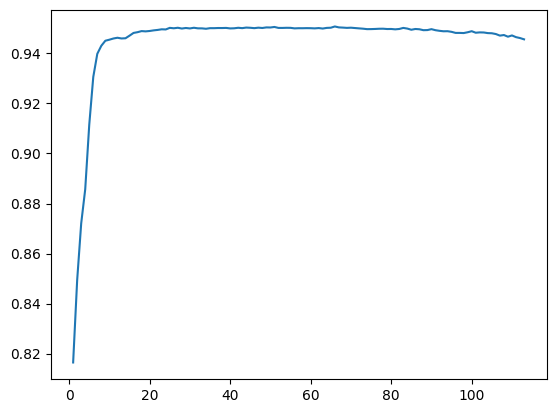

In [9]:
y_points = np.array(list(all_iterations['avg_score']))
x_points = np.array([i for i in range(1, len(y_points) + 1)])

plt.plot(x_points, y_points)